In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd

In [8]:
import datetime as dt

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [15]:
# **Query to retrieve the last 12 months of precipitation data and plot the results**

# last data point
last_datapoint = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_datapoint)

# 1 year ago data point
last_year=dt.date(2017, 8, 23)- dt.timedelta(days=365)
print(last_year)

#precipitation for the full year
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

#save to df
precip_df=pd.DataFrame(precip)
precip_df.head()

#change index to date
precip_df.set_index('date').head()


('2017-08-23',)
2016-08-23


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


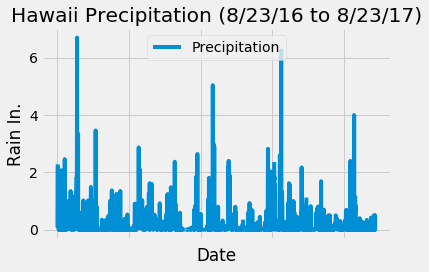

In [63]:
#plot graph
precip_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain In.")
plt.title("Hawaii Precipitation (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"],loc='upper center')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [64]:
# Design a query to show how many stations are available in this dataset?

stations= session.query(Measurement).group_by(Measurement.station).count()
print("The total number of stations is",stations)

The total number of stations is 9


In [47]:
# Most active stations in descending order

most_active_stations = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

print('Most Active Stations Descending Order')
print(most_active_stations)

max_obs = most_active_stations[0][0]  

print('--------------------------------------------------------------------------------------------')
print("The busiest Station was",max_obs,"with",most_active_stations[0][1],"weather observations.")


Most Active Stations Descending Order
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
--------------------------------------------------------------------------------------------
The busiest Station was USC00519281 with 2772 weather observations.


In [66]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp= session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(Measurement.station == max_obs).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
temp

[('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC00519281', '2016-09-18', 78.0),
 ('USC005192

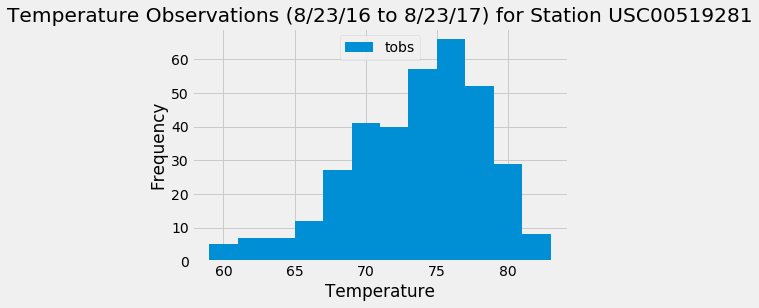

In [73]:
temp_df=pd.DataFrame(temp)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observations (8/23/16 to 8/23/17) for Station " + max_obs)
plt.legend(["tobs"],loc='upper center')
plt.show()